# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: [DataAnalyst](.\DataAnalyst)

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
# First, I'm going to import pandas for sure to use Python!
# I'm not sure what type of visualization I would use yet so I will import commonly used libraries from the class and exercises.

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Create a dataframe

df = pd.read_csv("DataAnalyst.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

* * *

_**Reminder of the business issue from the Checkpoint 1:**_

Business Issue: Research job market for Data Analysts. Analyze the followings based on 2,253 job listings scraped from Glassdoor.

1. What is the average salary?
2. Which city offers the highest and lowest salary?
3. Which city employs the most data analysts?
4. Which industry seeks the most data analysts?

* * *

In [3]:
# EDA Start!

# Preview of the dataset
# Using .head() will show me the header and columns with data in it.
# However, I don't want to run the whole dataset because it can be slow or too big. I will pull top 3 only. Let's see what it looks like!

df.head(3)

# From the result, I could find columns that I need: Salary Estimate, Location, and Industry.

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [4]:
# To answer the business issues/questions, I will need to know the followings:

# How many rows are in the dataset? 
    # ^ It can tell the number of jobs listed.

len(df)

## Result 2253
## There are 2253 of jobs listed!

2253

In [5]:
# How many locations are in the dataset?

df['Location'].drop_duplicates().count()

## Result 253
## Excluding duplicates, there are 235 locations are listed across 2253 job posts.

253

In [6]:
# How many industries are in the dataset? 

df['Industry'].drop_duplicates().count()

## Result 89
## Excluding duplicates, there are 89 industries are hiring Data Analysts across 2253 job posts.

89

In [7]:
# Most importantly, I need to see the Salary column in order to answer the first question of the business issue.
# However, I will skip this part for now as it requires data cleaning. 
# The salary column contains specific character - $, -, (, ) - and text. I will need to remove them.
# Data cleaning will be handled from the next assignment, Checkpoint 3.

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [8]:
# How many jobs in the dataset? 

totaljobs = [len(df)]
jobs = pd.DataFrame(totaljobs, columns = ['Number of Job Listings'], index = ['Count Total:'])
jobs

# I wanted to show a simple table that shows how many job listings in the dataset. 
# I chose a table rather than graphs because all I need is Count Total, not individual jobs and details.
# Applied the column and index name for a better readability.

,Number of Job Listings
Count Total:,2253


In [9]:
# Now I'm going to create a visualization with Location where listed the most jobs.
# I figured earlier from the EDA section above that there are 253 cities excluding duplicates in the dataset.
# Displaying 253 locations visually is too much to show, and I don't think it meets the ultimate purpose of data visualization.
# So I decided to show top 10% of the locations. Let's do top 25 then. 

location_top25 =  df['Location'].value_counts(ascending=False).head(25)
location_top25

#For easy handing, I made this result as a new dataframe.

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
Charlotte, NC          78
Houston, TX            72
Dallas, TX             66
San Diego, CA          62
Philadelphia, PA       56
Denver, CO             47
San Antonio, TX        45
San Jose, CA           38
Phoenix, AZ            35
Jersey City, NJ        33
Tempe, AZ              31
Seattle, WA            30
Irving, TX             29
Columbus, OH           29
Plano, TX              28
Santa Clara, CA        22
Salt Lake City, UT     22
El Segundo, CA         19
Jacksonville, FL       19
San Mateo, CA          18
Name: Location, dtype: int64

Text(0.5, 1.0, 'Top 25 Locations Where Posted Data Analyst Jobs Most!')

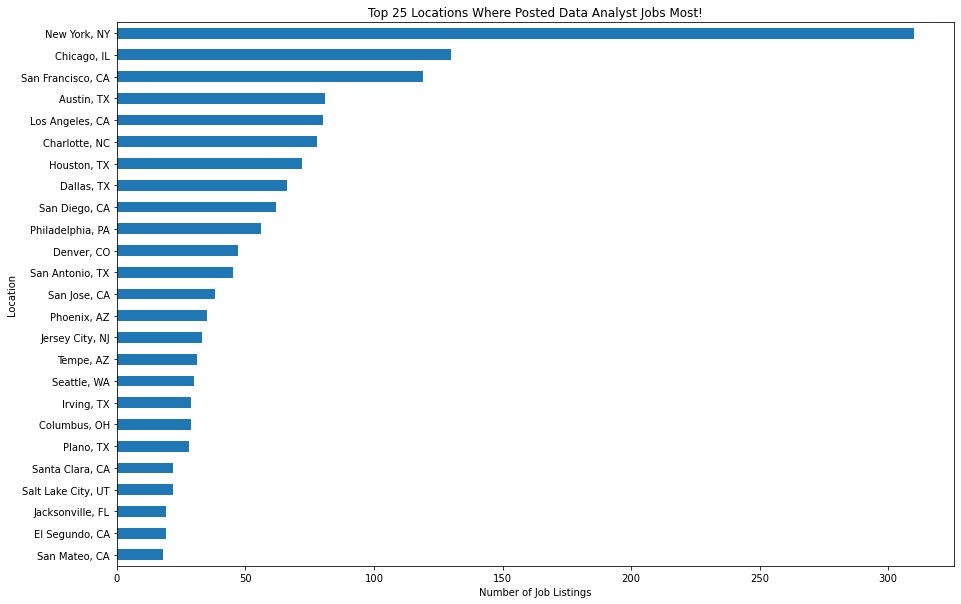

In [10]:
# Now I can apply Matplotlib's bar graph to the new dataframe.

location_top25.sort_values(ascending=True).plot(kind='barh',figsize=(15,10))
plt.xlabel('Number of Job Listings')
plt.ylabel('Location')
plt.title('Top 25 Locations Where Posted Data Analyst Jobs Most!')

# I chose horizontal bar graph because of the location name. It's a somewhat long string to display vertically so I applied 'barh'.
# After that, I figured the 'barh' graph displays the result backward: low number first at top, larger number last at the bottom.
# I wanted to reverse them so I applied 'sort_value' before '.plot' starts.
# Named the x label, y label, and Title!

In [11]:
# I'm going to do the same visualization but for Industry this time instead of Location.
# I figured from above that there are 89 industries excluding duplicates, I will do top 10 this time. 

df['Industry'].value_counts(ascending=False).head(10).to_frame()

# Well, result came out with the Industry value '-1', which is unknown. I need to drop that out.

,Industry
-1,353
IT Services,325
Staffing & Outsourcing,323
Health Care Services & Hospitals,151
Computer Hardware & Software,111
Consulting,111
Investment Banking & Asset Management,78
Enterprise Software & Network Solutions,69
Internet,65
Advertising & Marketing,51


In [12]:
# Let's drop the row where it has the value of '-1'  in Industry column. Then I can pull the Industry column again, and sort top 10.

# drop row has '-1' in Industry column
df_industry = df[df.Industry != '-1']

# get top 10 out of trimmed Industry column. Made a new dataframe for easy handling. 
industry_top10 = df_industry['Industry'].value_counts(ascending=False).head(10)

industry_top10


IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Computer Hardware & Software               111
Consulting                                 111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Banks & Credit Unions                       51
Name: Industry, dtype: int64

Text(0.5, 1.0, 'Top 10 Industries Seek Data Analysts Most!')

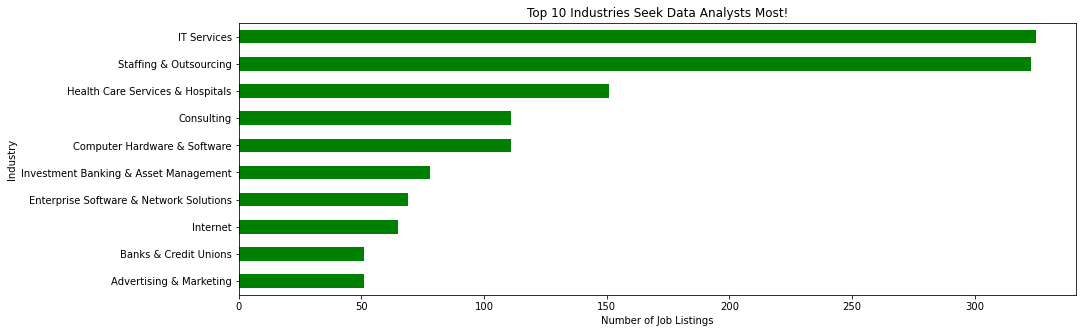

In [13]:
industry_top10.sort_values(ascending=True).plot(kind='barh',figsize=(15,5), color= 'green')
plt.xlabel('Number of Job Listings')
plt.ylabel('Industry')
plt.title('Top 10 Industries Seek Data Analysts Most!')

# I chose horizontal bar graph because of long strings in Industry column values. 
# Sorted to show top to bottom based on the counted numbers.
# Name x, y labels, and Title!

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
2. Do you have any concerns about your dataset?
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

Answer: 

1. Yes, it is pretty clean dataset! Of course I need to clean some columns but all the values are written in a certain format, which is appreciated! Thinking about the resources, which these were scrapped form Glassdoor, it makes sense. I'm assuming UI fields where these data collected were more likely dropdown style rather than free-form text. This can be something I need to consider in a job.
2. I wish there is data related information. I can't tell the trend even if I analyze the average salary because of lack of date information. But it would be still interesting (for me)!
3. Yes, I need to clean the Salary column as it contains lots of special characters. Also I may need to split the values in order to calculate its average between two numbers.